In [20]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import itertools
import seaborn as sns
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
sns.set()

In [3]:
df_in = pd.read_csv("data/train_in.csv", header=None)
# Training input data looks like this
df_in.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [4]:
# It has total 1707 vectors of digits' images
df_in.shape

(1707, 256)

In [5]:
df_out = pd.read_csv("data/train_out.csv", header=None, names=['label'])
# These are the labels for inputs
df_out.head()

,label
0,6
1,5
2,4
3,7
4,3


In [6]:
# It has to be at the same row size
df_out.shape

(1707, 1)

In [7]:
# we are merging them to create clouds by filtering  
df = df_in.join(df_out)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3


In [8]:
# We split our data into small dataFrames and finding their centroids
digits = dict()
centers = dict()
radiuses = dict()
for i in range(10):
    digits[i] = df[df['label']==i].iloc[:, :-1]
    centers[i] = digits[i].mean()
    radiuses[i] = digits[i].apply(lambda x:euclidean(x,centers[i]),axis=1).max()
    print(f"Digit {i} has {digits[i].shape[0]} points")

Digit 0 has 319 points
Digit 1 has 252 points
Digit 2 has 202 points
Digit 3 has 131 points
Digit 4 has 122 points
Digit 5 has 88 points
Digit 6 has 151 points
Digit 7 has 166 points
Digit 8 has 144 points
Digit 9 has 132 points


In [48]:
radiuses

{0: 15.892930339810135,
 1: 9.481363461112087,
 2: 14.168753588743385,
 3: 14.744758949449173,
 4: 14.533522167316484,
 5: 14.451951332761583,
 6: 14.03151781521896,
 7: 14.90896865483367,
 8: 13.705781920637948,
 9: 16.138696018426046}

In [10]:
digits[0].head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
8,-1.0,-1.0,-1.0,-1.0,-1.0,-0.454,0.879,-0.745,-1.000,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.0,-1.0,-1.0,-1.0
11,-1.0,-1.0,-1.0,-1.0,-1.0,-0.877,0.233,1.000,0.996,0.116,...,-0.041,0.947,0.988,0.009,-0.931,-1.000,-1.0,-1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,-1.0,-0.990,0.019,0.640,-0.553,-0.999,...,0.363,1.000,0.820,-0.064,-0.969,-1.000,-1.0,-1.0,-1.0,-1.0
49,-1.0,-1.0,-1.0,-1.0,-1.0,0.100,0.452,-0.665,-0.358,-0.209,...,0.865,1.000,1.000,0.838,0.085,-0.847,-1.0,-1.0,-1.0,-1.0
53,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.320,0.731,-0.657,-1.000,...,-0.663,0.573,0.702,-0.762,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0


In [11]:
digits[0].shape

(319, 256)

In [11]:
embedding = MDS(n_components=3)

In [30]:
digits0_transformd = embedding.fit_transform(digits[0])
digits1_transformd = embedding.fit_transform(digits[1])
digits2_transformd = embedding.fit_transform(digits[2])
digits3_transformd = embedding.fit_transform(digits[3])
digits4_transformd = embedding.fit_transform(digits[4])
digits5_transformd = embedding.fit_transform(digits[5])
digits6_transformd = embedding.fit_transform(digits[6])
digits7_transformd = embedding.fit_transform(digits[7])
digits8_transformd = embedding.fit_transform(digits[8])
digits9_transformd = embedding.fit_transform(digits[9])

In [13]:
digits0_transformd.shape

(319, 3)

In [32]:
digits_all = df.iloc[:, :-1]

In [33]:
digits_all_transformd = embedding.fit_transform(digits_all)

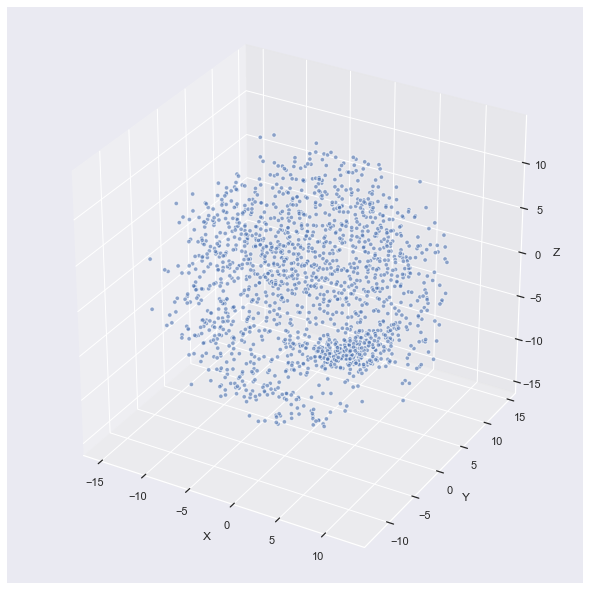

In [42]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(figsize=(8, 8))

ax = Axes3D(fig)

ax.scatter(digits_all_transformd[:,0], digits_all_transformd[:,1], digits_all_transformd[:,2], s=20, alpha=0.6, edgecolors='w')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [43]:
embedding2d = MDS(n_components=2)
digits_all_transformd2d = embedding2d.fit_transform(digits_all)

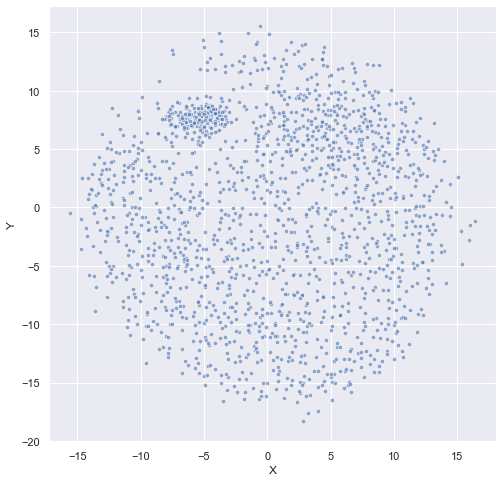

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(digits_all_transformd2d[:,0], digits_all_transformd2d[:,1], s=20, alpha=0.6, edgecolors='w')

ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')
plt.show()

In [49]:
centers[0].shape

(256,)

In [50]:
radiuses[0]

15.892930339810135

In [51]:
distances = np.zeros(shape=(10,10))
for (k1, k2) in itertools.product(centers.keys(), repeat=2):
    distances[k1,k2] = np.round(euclidean(centers[k1], centers[k2]),2)

In [52]:
distances

array([[ 0.  , 14.45,  9.33,  9.14, 10.77,  7.52,  8.15, 11.86,  9.91,
        11.49],
       [14.45,  0.  , 10.13, 11.73, 10.17, 11.12, 10.61, 10.74, 10.09,
         9.93],
       [ 9.33, 10.13,  0.  ,  8.18,  7.93,  7.91,  7.33,  8.87,  7.08,
         8.89],
       [ 9.14, 11.73,  8.18,  0.  ,  9.09,  6.12,  9.3 ,  8.92,  7.02,
         8.35],
       [10.77, 10.17,  7.93,  9.09,  0.  ,  8.  ,  8.78,  7.58,  7.38,
         6.01],
       [ 7.52, 11.12,  7.91,  6.12,  8.  ,  0.  ,  6.7 ,  9.21,  6.97,
         8.26],
       [ 8.15, 10.61,  7.33,  9.3 ,  8.78,  6.7 ,  0.  , 10.89,  8.59,
        10.44],
       [11.86, 10.74,  8.87,  8.92,  7.58,  9.21, 10.89,  0.  ,  8.47,
         5.43],
       [ 9.91, 10.09,  7.08,  7.02,  7.38,  6.97,  8.59,  8.47,  0.  ,
         6.4 ],
       [11.49,  9.93,  8.89,  8.35,  6.01,  8.26, 10.44,  5.43,  6.4 ,
         0.  ]])

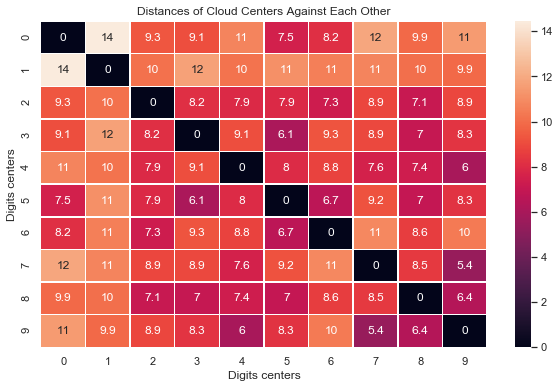

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(distances, annot=True, linewidths=.5)
ax.set_xlabel('Digits centers')
ax.set_ylabel('Digits centers')
ax.set_title("Distances of Cloud Centers Against Each Other")
fig.savefig("images/CloudCenterDistances.png")
plt.show()